In [ ]:
#EDA=EXPLORATORY DATA ANALYSIS
#GET A BRIEF INTRODUCTION ABOUT THE DATASET.
#IDENTIFYING NULL VALUES WITHIN ATTRIBUTES AND EITHER DROP OR REPLACE THEM.
#IDENTIFYING DUPLICATE VALUES AND ELIMINATE THEM.
#IDENTIDYING THE OUTLIERS AND MAKE THEM DELETED.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/insurance_data.csv')#insurance Dataset
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
#GET A BRIEF INTRODUCTION ABOUT THE DATASET.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
#IDENTIFYING NULL VALUES WITHIN ATTRIBUTES AND EITHER DROP OR REPLACE THEM.
print(df.isnull().sum())
print('total number of null values:',df.isnull().sum().sum())

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64
total number of null values: 52


In [ ]:
#IF WE WANT TO DELETE NULL VALUES:
df.dropna(inplace=True)


In [ ]:
#IF WE WANT TO REPLACE THE NULL VALUES:
#FOR CATEGORICAL COLUMN:WITH MODE VALUE
#FOR NEUMERICAL COLUMN:WITH MEAN OR MEDDILE VALUE
col_list=list(df.columns)
for x in col_list:
  if df[x].dtypes=='object':
    df[x].fillna(df[x].mode,inplace=True)
  else:
    df[x].fillna(df[x].mean(),inplace=True)
null_val=df.isnull().sum().sum()
print('total number of null values:',null_val)

total number of null values: 0


<ipython-input-10-898410f72ce5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mean(),inplace=True)


In [ ]:
#IDENTIFYING DUPLICATE VALUES AND ELIMINATE THEM.
df.duplicated().sum()
#if there is any duplicates:-
df.drop_duplicates(inplace=True)

0

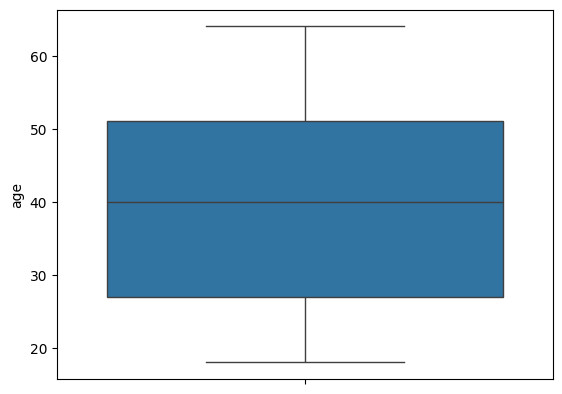

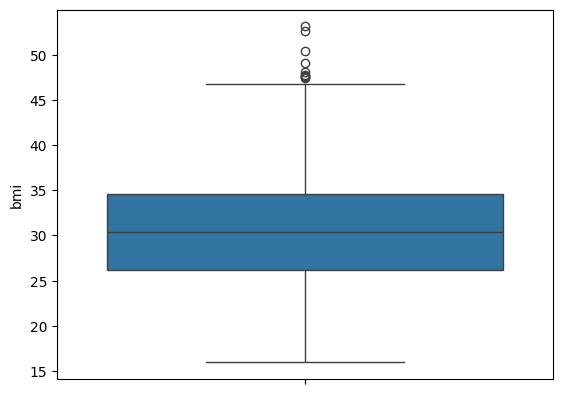

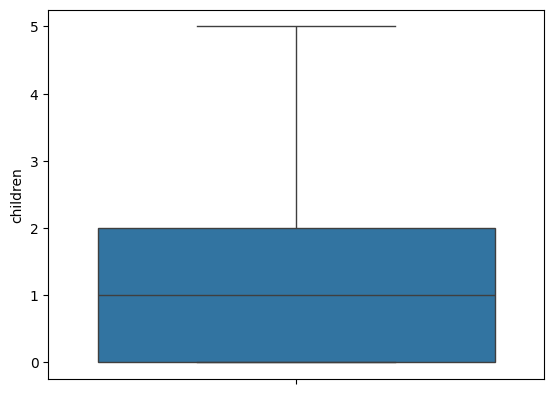

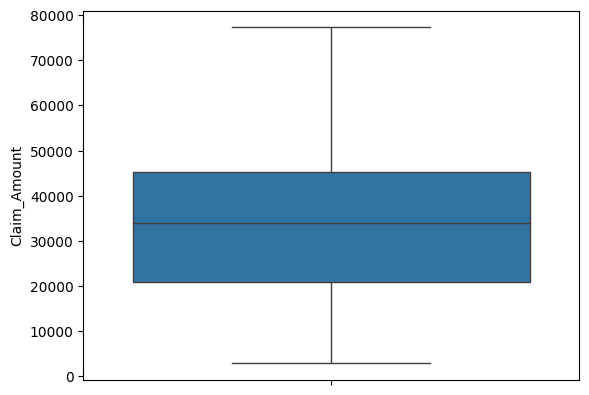

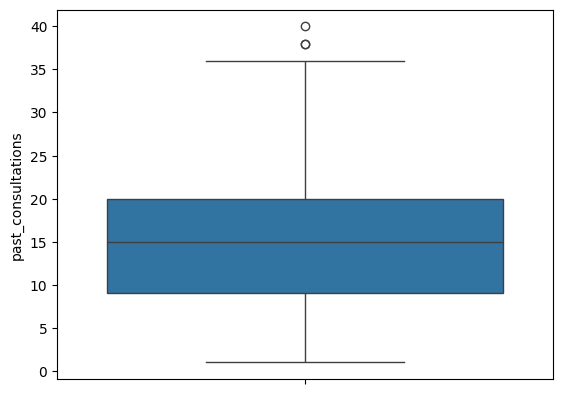

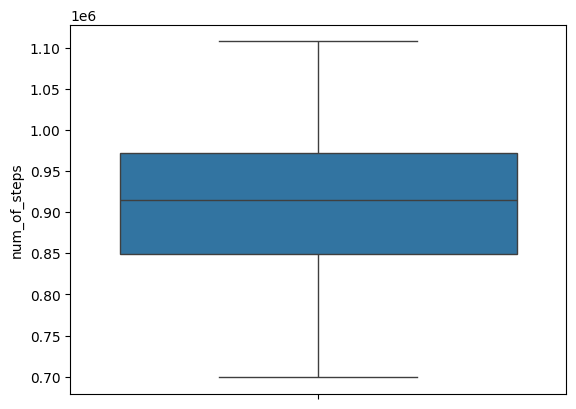

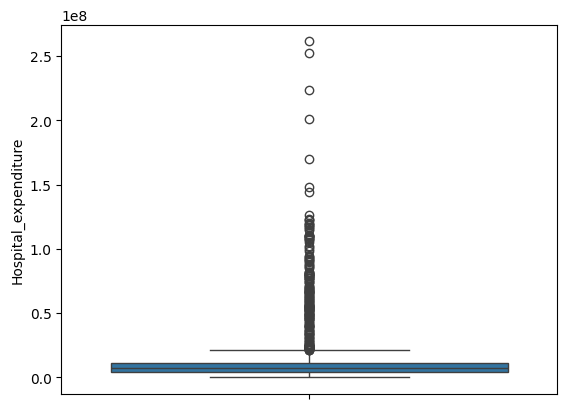

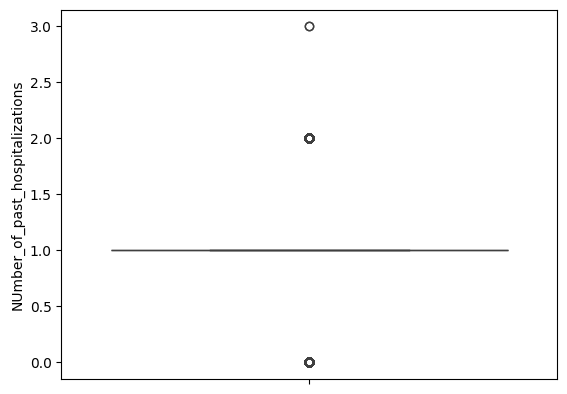

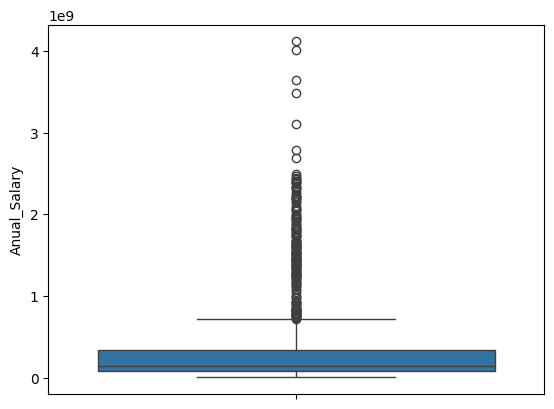

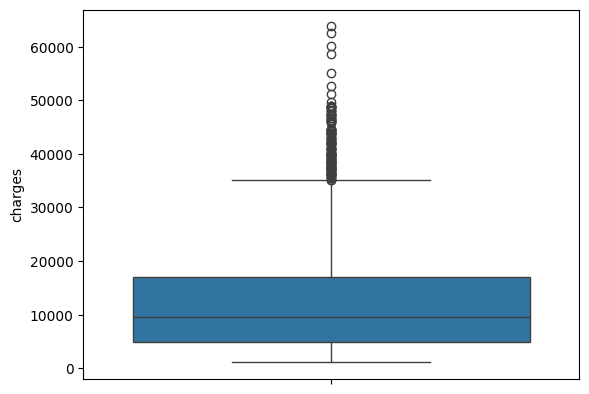

In [ ]:
#IDENTIDYING THE OUTLIERS AND MAKE THEM DELETED.
for i in col_list:
  if df[i].dtypes!='object':
    sns.boxplot(df[i])
    plt.show()


In [ ]:
#WRITE A CODE TO REMOVE ALL THE OUTLIERS FROM BMI:-
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
df=df[(df['bmi']>=lower_limit) & (df['bmi']<=upper_limit)]


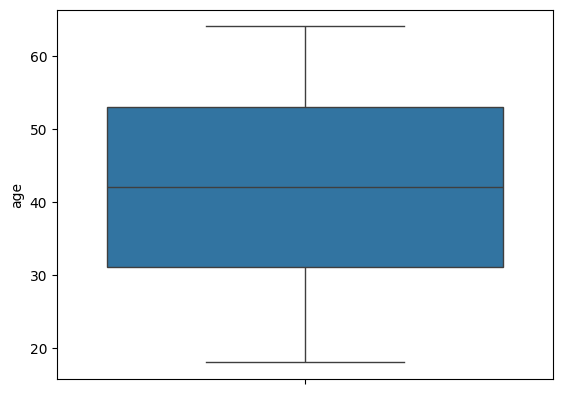

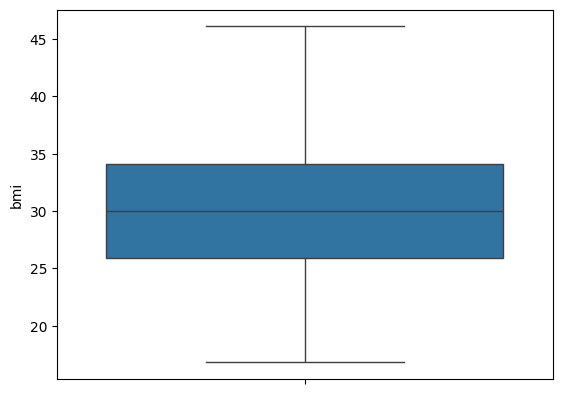

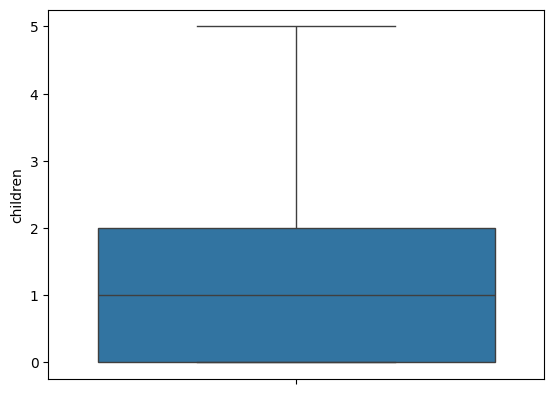

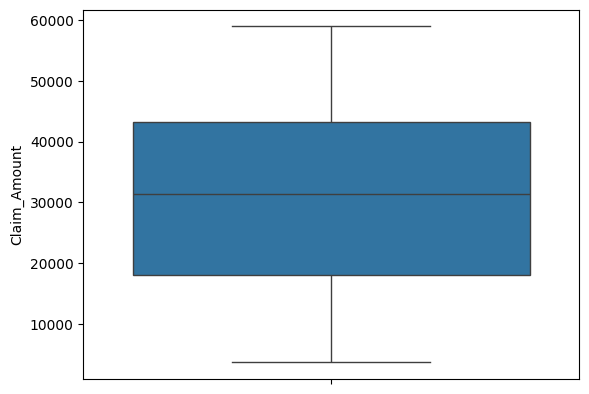

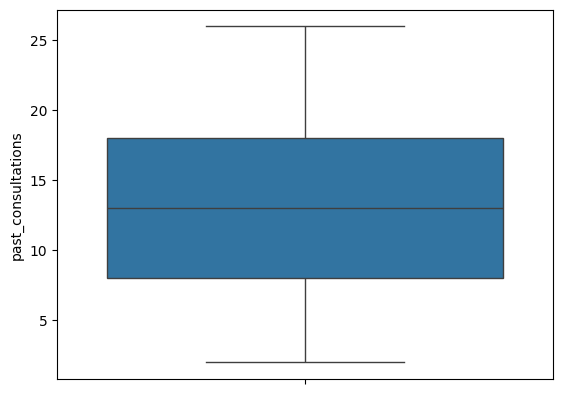

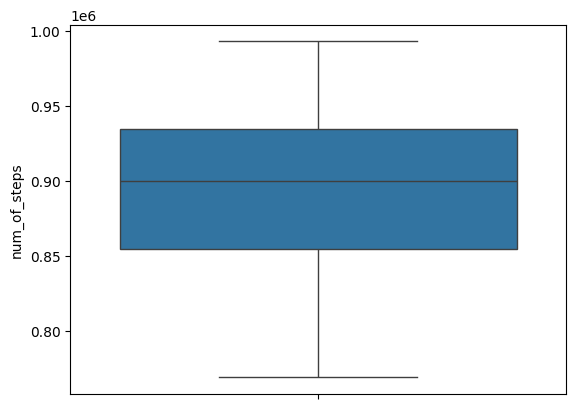

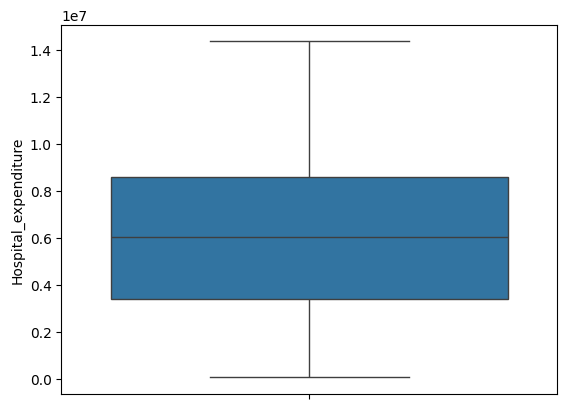

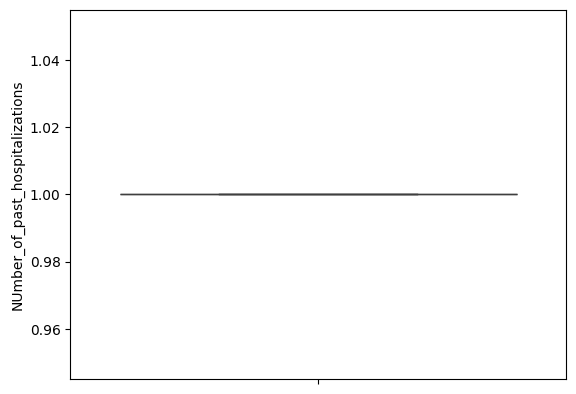

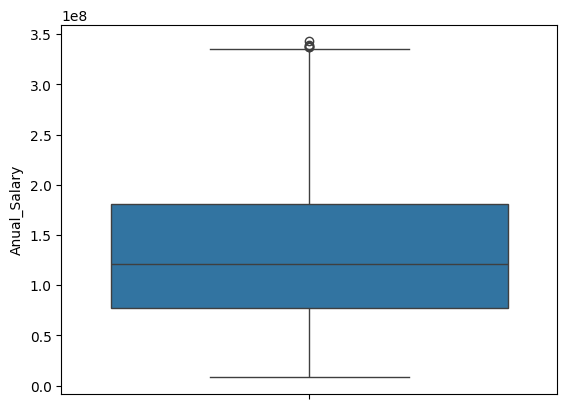

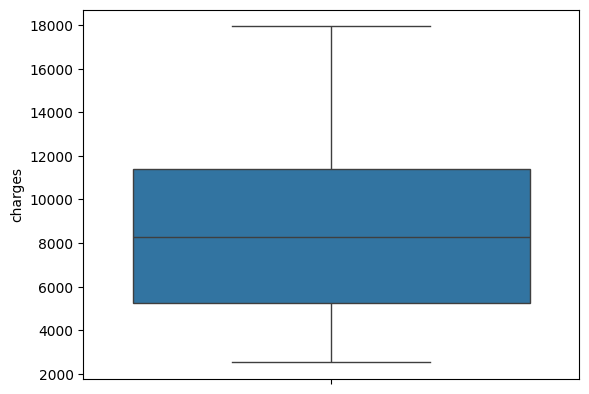

In [ ]:
#TRY TO ELIMINATE ALL THE OUTLIERS FROM THE DATASET AND THEN CHECK PLOTS:-
for i in col_list:
  if df[i].dtypes!='object':
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    df=df[(df[i]>=lower_limit) & (df[i]<=upper_limit)]

for i in col_list:
  if df[i].dtypes!='object':
    sns.boxplot(df[i])
    plt.show()


In [ ]:
#NOW FROM THE CLEAN DATA TRY TO CREATE A REGRESSION MODEL
#WHERE THE DEPENDENT VERIABLE IS 'CHARGES'.
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,20.0,male,28.025,1.0,yes,33996.01743,16.0,972338.0,1.064227e+07,1.0,3.374124e+08,northwest,17560.37975
1018,32.0,female,23.650,1.0,no,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,southeast,17626.23951
1019,28.0,male,23.980,3.0,yes,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,southeast,17663.14420
1021,25.0,female,41.325,0.0,no,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,northeast,17878.90068


In [ ]:
#SOME CATEGORICAL ATTRIBUTES ARE PRESENT WHICH CAN EFFECT OUR TARGET COLUMN:-
#SO WE NEED TO CONVERT THEN CATEGORICAL COLUMN INTO NEUMERICAL COLUMN,
#WITH THE HELP OF LABEL ENCODING WE CAN CONVERT:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col_list:
  if df[i].dtypes=='object':
    df[i]=le.fit_transform(df[i])


In [ ]:
#NOW ALL ARE CATEGORICAL DATAS:-
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,20.0,1,28.025,1.0,1,33996.01743,16.0,972338.0,1.064227e+07,1.0,3.374124e+08,1,17560.37975
1018,32.0,0,23.650,1.0,0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,2,17626.23951
1019,28.0,1,23.980,3.0,1,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,2,17663.14420
1021,25.0,0,41.325,0.0,0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,0,17878.90068


In [ ]:
#NOW WE WILL CREATE REGRESSION MODEL
#REQUIRED LIBRARIES:-
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#x_train:-training question independent columns
#x_test:-testing questions independent columns
#y_train:-training answer dependent column
#y_test:-testing answer dependent column

In [ ]:
X=df.iloc[:,:12]
Y=df.iloc[:,-1]

In [ ]:
#TRAINING QUESTION INDEPENT COLUMNS
X

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,20.0,1,28.025,1.0,1,33996.01743,16.0,972338.0,1.064227e+07,1.0,3.374124e+08,1
1018,32.0,0,23.650,1.0,0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,2
1019,28.0,1,23.980,3.0,1,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,2
1021,25.0,0,41.325,0.0,0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,0


In [ ]:
#TRAINING ANS DEPENDENT COLUMN
Y


,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1017,17560.37975
1018,17626.23951
1019,17663.14420
1021,17878.90068


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
#TRAINING QUESTION:-
X_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
754,48.0,1,35.625,4.0,0,17368.24656,14.0,931847.0,4.724863e+06,1.0,1.902135e+08,0
269,22.0,1,19.950,3.0,0,46464.83222,3.0,827067.0,7.843290e+06,1.0,3.423338e+07,0
907,61.0,0,44.000,0.0,0,14825.98631,12.0,949860.0,1.066482e+07,1.0,1.920431e+08,3
685,47.0,1,29.830,3.0,0,24999.30286,21.0,913240.0,1.871147e+06,1.0,1.675184e+08,1
416,35.0,0,43.340,2.0,0,32209.69864,11.0,856159.0,1.443247e+06,1.0,3.749955e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
705,51.0,0,40.660,0.0,0,10803.52831,7.0,929537.0,2.417442e+06,1.0,1.777211e+08,0
338,30.0,0,43.120,2.0,0,7510.49738,2.0,844230.0,8.724018e+06,1.0,1.168626e+08,2
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
984,62.0,0,38.095,2.0,0,31290.40351,13.0,976717.0,8.442531e+06,1.0,3.264673e+08,0


In [ ]:
#TESTING QUESTION:
X_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
524,41.0,1,30.590,2.0,0,45803.60521,16.0,871633.0,7.393671e+06,1.0,6.249898e+07,1
986,18.0,1,25.175,0.0,1,11482.49351,8.0,961149.0,1.356840e+07,1.0,3.003624e+08,0
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
953,18.0,0,38.280,0.0,0,29441.40783,19.0,960921.0,1.100894e+07,1.0,2.192346e+08,2
872,54.0,0,24.605,3.0,0,39676.11916,15.0,942200.0,4.955162e+06,1.0,1.976492e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...
717,50.0,0,27.075,1.0,0,35314.03559,11.0,911005.0,6.690692e+06,1.0,1.130053e+08,0
348,36.0,0,26.200,0.0,0,36099.04146,2.0,842770.0,6.156371e+06,1.0,7.434880e+07,3
509,46.0,1,22.300,0.0,0,39421.71581,11.0,893621.0,8.322795e+06,1.0,7.356161e+07,3
607,45.0,0,30.900,2.0,0,48253.75000,21.0,892503.0,4.676853e+06,1.0,1.660518e+08,3


In [ ]:
#TRAINING ANSWER:-
Y_train

,charges
754,10736.87075
269,4005.42250
907,13063.88300
685,9620.33070
416,5846.91760
...,...
705,9875.68040
338,4753.63680
153,2534.39375
984,15230.32405


In [ ]:
#TESTING ANSWER:-
Y_test

,charges
524,7256.72310
986,15518.18025
155,2585.26900
953,14133.03775
872,12479.70895
...,...
717,10106.13425
348,4883.86600
509,7147.10500
607,8520.02600


In [ ]:
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#MODEL PEDICTION:-
model_prediction=linear_model.predict(X_test)
model_prediction

array([ 6111.62289044, 15833.33728646,  1390.40221344, 13217.75477844,
       12201.81281479,  8082.00934492,  8936.48728769,  4450.77894581,
        2975.96009233,  9049.7207635 ,  6779.16683161,  4023.58302347,
       11876.7810593 ,  7908.63857522,  4888.21769425,  8052.39201432,
        3137.29115409,  5234.88150912,  8061.71608377,  6863.2750388 ,
        3617.73349465, 13513.15719972, 16259.89661065, 11955.12876563,
        9400.03105522,  5728.61734758, 12023.00398913,  6075.74369616,
        2100.73640854, 10297.90414076, 13682.79176588, 10262.39419603,
       11557.13138097, 12443.60566378,  7083.94206049,  6455.13015657,
        5796.79410224, 11715.07010829,  8705.6800039 ,  9038.89796237,
       10247.69058698,  4034.66065132,  3933.19058973,  9497.15646971,
        7587.14371906,  7888.63029821,  8463.19547013,  7482.45430611,
        8778.98730697, 10589.05014938,  7041.6133702 , 11101.92179128,
        4226.21344895,  7038.88954007,  8578.70827127,  2565.12227933,
      

In [ ]:
Y_test


,charges
524,7256.72310
986,15518.18025
155,2585.26900
953,14133.03775
872,12479.70895
...,...
717,10106.13425
348,4883.86600
509,7147.10500
607,8520.02600


In [ ]:
#NOW WE NEED TO COMPARE THE ACCURACY BWTN Y_TEST AND MODEL_PREDICTION.
#METHODS:-
#MSE/RMSE/R2_SCORE
from sklearn.metrics import mean_squared_error,r2_score
accuracy=r2_score(Y_test,model_prediction)
print('Model prediction accuracy is:-',round(accuracy*100,2),'%')

Model prediction accuracy is:- 96.04 %


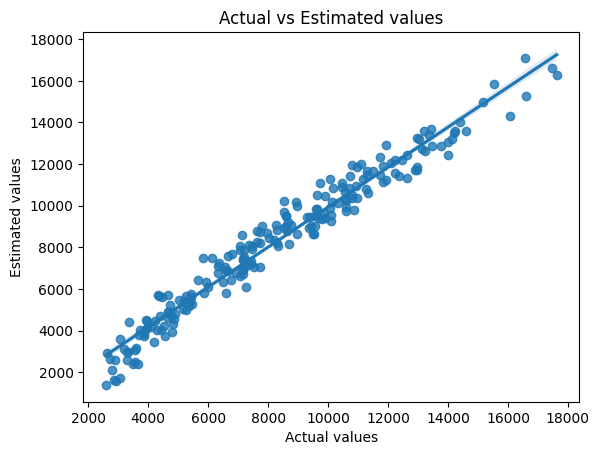

In [ ]:
#GRAPHICAL REPRESENTATION OF THE COMPARISON BETWEEN ACTUAL AND DESIRED O/P
sns.regplot(x=Y_test,y=model_prediction)
plt.xlabel('Actual values')
plt.ylabel('Estimated values')
plt.title('Actual vs Estimated values')
plt.show()